In [58]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [10]:
fname = 'BigGAN_C10_seed0_Gch64_Dch64_bs128_nDs4_Glr2.0e-04_Dlr2.0e-04_Gnlrelu_Dnlrelu_GinitN02_DinitN02_ema'

In [61]:
def parse_log(fname, loss):
    itr = []
    loss_val = []
    with open(fname+'/'+loss+'.log') as f:
        t = f.readlines()
        for i, item in enumerate(t):
            it, val = item.split(":")
            itr.append(int(it))
            loss_val.append(float(val))
    return np.array(itr), np.array(loss_val)

def parse_eval_log(fname):
    itr = []
    ISm = []
    ISs = []
    iFID = []
    FID = []
    P = []
    R = []
    with open(fname+'_log.jsonl') as f:
        t = f.readlines()
        for i, item in enumerate(t):
            iteration = json.loads(item)
            itr.append(iteration['itr'])
            ISm.append(iteration['IS_mean'])
            ISs.append(iteration['IS_std'])
            P.append(iteration['P'])
            R.append(iteration['R'])
            if not math.isnan(iteration['FID']):  
                iFID.append(iteration['itr'])
                FID.append(iteration['FID'])

    return  itr, ISm, ISs, iFID, FID, P, R
def outlier(x):
    ypbot = np.percentile(x, 0.5)
    yptop = np.percentile(x, 99.5)

    ypad = 0.2*(yptop - ypbot)
    ymin = ypbot - ypad
    ymax = yptop + ypad
    return ymin, ymax

In [63]:
itr, ISm, ISs, iFID, FID, P, R = parse_eval_log(fname)

In [44]:
itr, loss = parse_log(fname, 'G_loss')

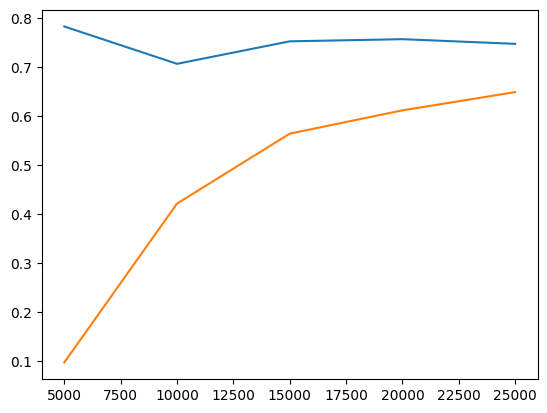

In [65]:
plt.plot(itr, P)
plt.plot(itr, R)


In [20]:
outlier(loss)

(-1.8620320000000001, 1.2569720000000002)